<h1>Backtest a technical indicator

<h3>Install the necessary packages

In [24]:
! pip install python-binance

In [25]:
! pip install ta

<h3>Import des libraries necessaire

In [34]:
import pandas as pd
from binance.client import Client
import ta
import numpy as np
import matplotlib.pyplot as plt

<h3>Importer les donnees de la libraries binance

In [130]:
historicalData = Client().get_historical_klines("BTCUSDT",Client.KLINE_INTERVAL_1HOUR,"01 January 2017")
data = pd.DataFrame(historicalData, columns = ['timestamp', 'open','high','low','close','volume','close_time','quote_av','trades','tb_base_av','tb_quote_av','ignore'])

<h3> Manipulate the data

<h4> Select the data to use

In [131]:
data['close'] = pd.to_numeric(data['close'])
data['SMA200'] = ta.trend.sma_indicator(data['close'], 200)
data['SMA600'] = ta.trend.sma_indicator(data['close'], 600)

<h4> Use the Timestamp as an index

In [132]:
data_used = data[['close','SMA200', 'SMA600']].set_index(data['timestamp'])
data_used.index = pd.to_datetime(data_used.index, unit = 'ms')
data_used.head()

,close,SMA200,SMA600
timestamp,,,
2017-08-17 04:00:00,4308.83,NaN,NaN
2017-08-17 05:00:00,4315.32,NaN,NaN
2017-08-17 06:00:00,4324.35,NaN,NaN
2017-08-17 07:00:00,4349.99,NaN,NaN
2017-08-17 08:00:00,4360.69,NaN,NaN


<h3> Implement the trading strategy based on moving average

In [136]:
# Start with 1000 USDT and 0 BTC

usdt = 1000
btc = 0
lastIndex = data_used.first_valid_index()
dates = []
price = []
i = 0

for index, row in data_used.iterrows() :
    # Buy when SMA_200 > SMA_600
    if data_used['SMA200'][lastIndex] > data_used['SMA600'][lastIndex] and usdt > 10 :
        btc = usdt / data_used['close'][index]
        btc = btc - 0.0007 * btc  
        usdt = 0
        
        print("Buy the bitcoin ", data_used['close'][index],'$ at', index)
        dates.append(index)
        price.append(data_used['close'][index])
        i+=1

    # Sell when SMA_200 < SMA_600    
    if data_used['SMA200'][lastIndex] < data_used['SMA600'][lastIndex] and btc > 0.0001 :
        usdt = btc * data_used['close'][index]
        usdt = usdt - 0.0007 * usdt 
        btc = 0
        
        print("Sell the bitcoin ", data_used['close'][index],'$ at', index)
        dates.append(index)
        price.append(data_used['close'][index])
        i+=1
    
    lastIndex = index

print("\nThe number of Long & Short :",i)

Buy the bitcoin  4176.24 $ at 2017-09-11 10:00:00
Sell the bitcoin  4259.44 $ at 2017-09-12 13:00:00
Buy the bitcoin  4302.02 $ at 2017-10-01 08:00:00
Sell the bitcoin  16351.02 $ at 2017-12-27 05:00:00
Buy the bitcoin  14219.61 $ at 2018-01-10 06:00:00
Sell the bitcoin  14195.0 $ at 2018-01-15 12:00:00
Buy the bitcoin  11082.94 $ at 2018-02-19 18:00:00
Sell the bitcoin  8704.0 $ at 2018-03-11 07:00:00
Buy the bitcoin  8018.98 $ at 2018-04-16 21:00:00
Sell the bitcoin  8665.97 $ at 2018-05-14 00:00:00
Buy the bitcoin  6584.36 $ at 2018-07-07 10:00:00
Sell the bitcoin  7087.99 $ at 2018-08-07 11:00:00
Buy the bitcoin  6902.74 $ at 2018-08-28 04:00:00
Sell the bitcoin  6355.0 $ at 2018-09-11 03:00:00
Buy the bitcoin  6669.36 $ at 2018-09-27 19:00:00
Sell the bitcoin  6309.02 $ at 2018-10-12 22:00:00
Buy the bitcoin  6573.58 $ at 2018-10-20 10:00:00
Sell the bitcoin  6491.85 $ at 2018-10-28 10:00:00
Buy the bitcoin  4125.4 $ at 2018-12-24 04:00:00
Sell the bitcoin  3588.24 $ at 2019-01-13

<h3> The total win obtained with this strategy

In [123]:
finalResult = usdt + btc * data_used['close'].iloc[-1] 
print("Final Result :",finalResult,'USDT')

Final Result : 23003.21756624284 USDT


In [124]:
print("Buy at the first date and sell at the last date \nFinal Result :", (1000 / data_used['close'].iloc[0]) * data_used['close'].iloc[-1],'USDT')

Buy at the first date and sell at the last date 
Final Result : 5312.56048625729 USDT


<h3> The growth of Bitcoins

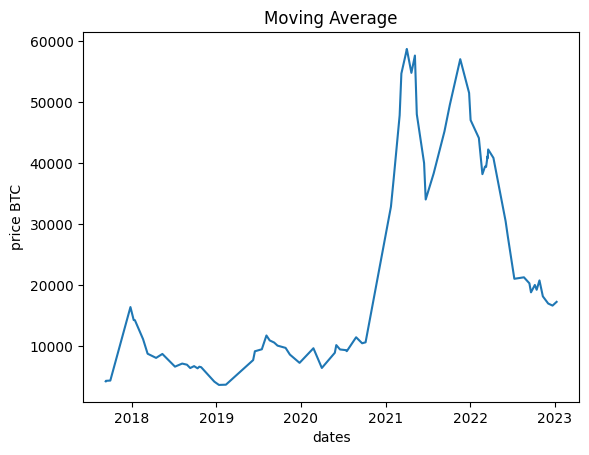

In [128]:
plt.title("Moving Average")
plt.xlabel("dates")
plt.ylabel("price BTC")

plt.plot(dates,price)
plt.show()